## Histogram Equalization from scratch 

In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

- Img2prb
    - Input: Image 
    - Output: {pixel: prob}


- Intensity Trasnform 
    - Input: {pixel: prob}
    - Output: {s:r} # a mapping between s to r
    
- map2img
    - Input: Input Image, {s:r}
    - Output: Final Image got from mapping r to s 

- Plot histogram
    - Input: Image 
    - Output: Plot histogram 

In [2]:
im = cv2.imread("light_image.tif")

In [3]:
im.shape

(500, 500, 3)

In [4]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

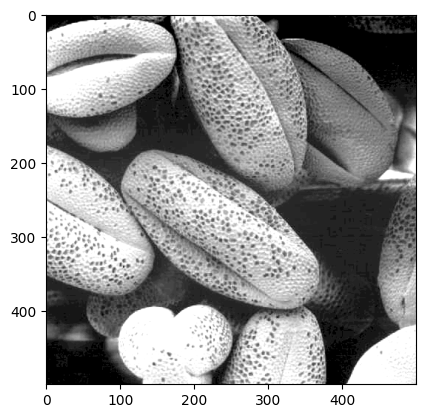

In [5]:
plt.imshow(gray, cmap="gray")

In [6]:
def img2prob(image):
    """
    Given an input image (gray scale), it returns the dict {pixel: prob}
    Assuming that intensity level is 256 (8 bit image)
    """
    unique, counts = np.unique(image, return_counts=True)
    
    # set the dictionaty {pixel:0}
    prob_dict = {i:0 for i in range(0,256)}
    for (pixel_value, count) in zip(unique, counts):
        prob_dict[pixel_value] = count
    
    #convert from freq to prob
    prob_dict = {k:v / sum(prob_dict.values()) for k,v in prob_dict.items()}
    
    return prob_dict

In [7]:
prob_dict = img2prob(gray)

(0.0, 0.1203678)

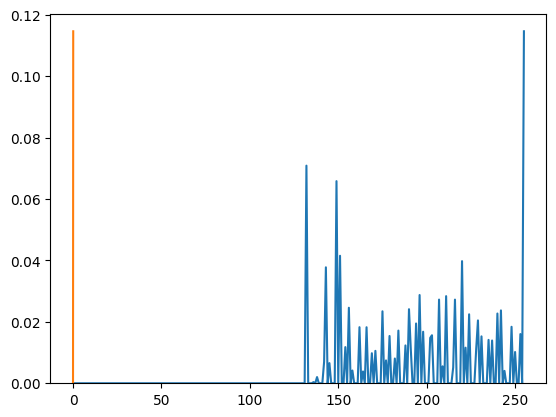

In [69]:
plt.bar(prob_dict.items(), prob_dict.values())
plt.ylim(0,)

In [8]:
sum(prob_dict.values())

1.0000000000000002

In [95]:
def plot_histogram(image, y_lim=100):
    plt.hist(np.ravel(image), bins=255)
    plt.xlim([-2,255])
    plt.show()

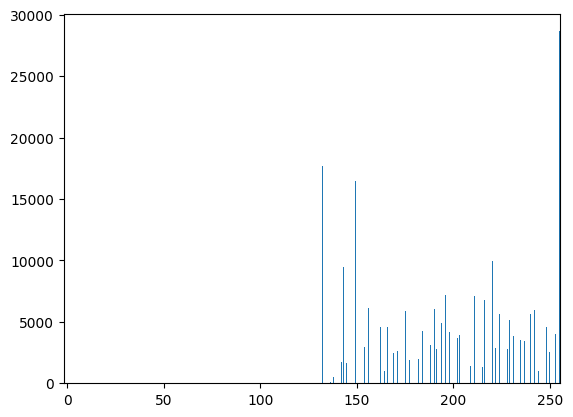

In [96]:
plot_histogram(gray)

In [97]:
def intensity_transform(prob_dict):
    """
    Input: prob_dict(dict) {pixel: prob}
    Output: r2s_mapping {r:s}
    """
    values = list(prob_dict.values())
    s_values = (np.cumsum(values, axis=0) *255).astype('int')
    r2s_mapping = {i:j for (i,j) in zip(range(0,256), s_values)}
    return r2s_mapping

In [98]:
transform_mapping = intensity_transform(prob_dict)

In [99]:
gray.shape

(500, 500)

In [100]:
def r2s(r, mapping_func=transform_mapping):
    return mapping_func[r]

r2s_vectorized = np.vectorize(r2s)

In [101]:
hist_eq_image = np.array(list(map(r2s_vectorized, gray)))

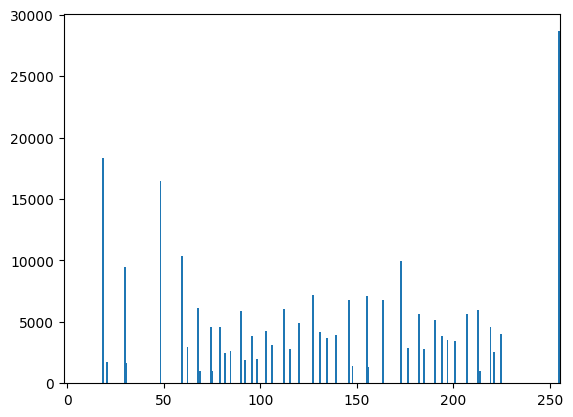

In [102]:
plot_histogram(hist_eq_image)

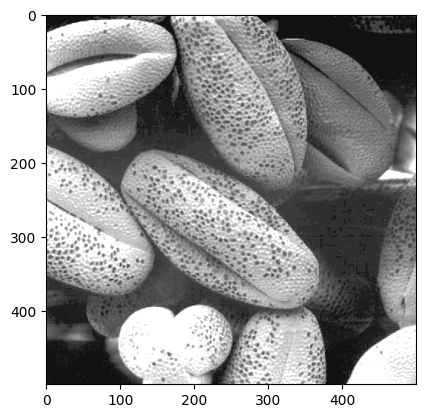

In [50]:
plt.imshow(hist_eq_image, cmap="gray", vmax=255, vmin=0)

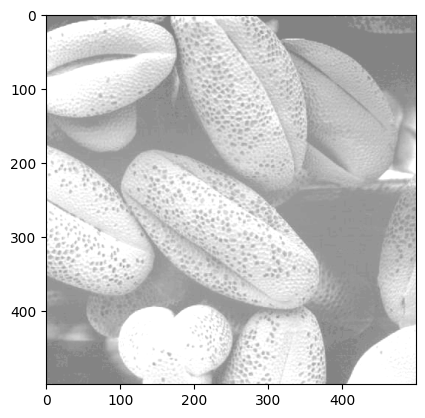

In [52]:
plt.imshow(gray, cmap="gray", vmax=255, vmin=0)

In [ ]:
def HistogramEqualization(image):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    prob_dict = img2prob(gray)
    transform_mapping = intensity_transform(prob_dict)
    r2s_vectorized = np.vectorize(r2s)
    hist_eq_image = np.array(list(map(r2s_vectorized, gray)))
    
    plt.subplot

In [73]:
output = cv2.equalizeHist(gray)

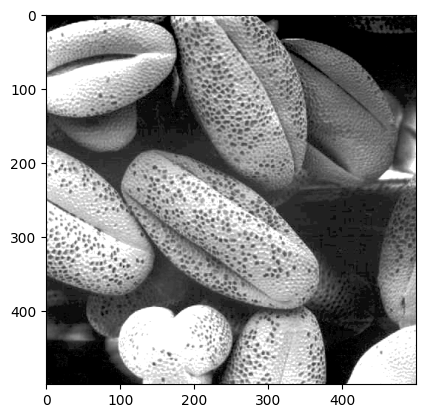

In [75]:
plt.imshow(output, cmap="gray")

In [76]:
output

array([[  0,   0,   0, ..., 105, 105,  92],
       [  0,   0,   0, ..., 102, 102,  85],
       [  0,   0,   0, ...,  78,  78,  66],
       ...,
       [ 33,   0,   0, ..., 216, 210, 210],
       [ 44,   1,   0, ..., 210, 210, 194],
       [ 54,  15,   0, ..., 204, 204, 177]], dtype=uint8)

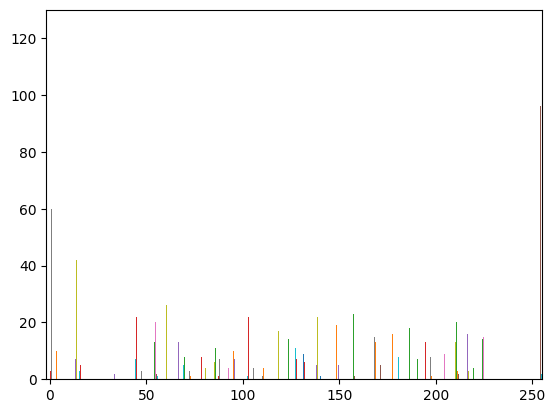

In [78]:
plot_histogram(output)

In [77]:
hist_eq_image

array([[ 18,  18,  18, ..., 115, 115, 103],
       [ 18,  18,  18, ..., 112, 112,  96],
       [ 18,  18,  18, ...,  90,  90,  79],
       ...,
       [ 48,  18,  18, ..., 219, 213, 213],
       [ 59,  18,  18, ..., 213, 213, 197],
       [ 68,  31,  18, ..., 207, 207, 182]])

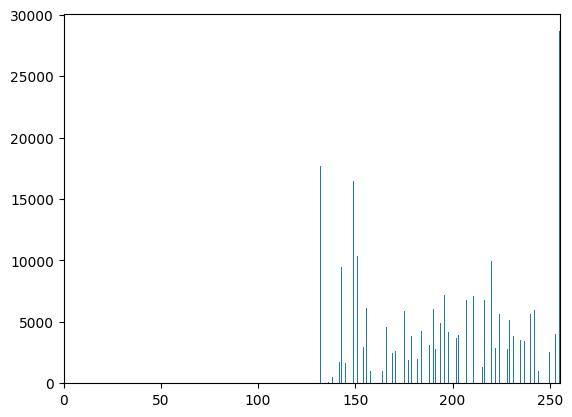

In [88]:
plt.hist(np.ravel(gray), bins=255)
plt.xlim(0,255)
plt.show()

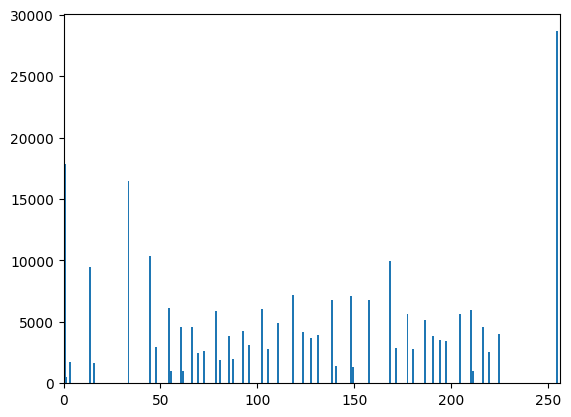

In [92]:
plt.hist(np.ravel(output), bins=255)
plt.xlim(0,256)
plt.show()

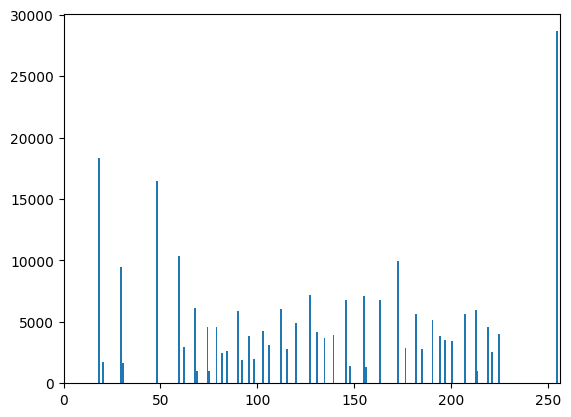

In [91]:
plt.hist(np.ravel(hist_eq_image), bins=255)
plt.xlim(0,256)
plt.show()